In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Haar cascades
- 머신러닝 기반의 object 검출 알고리즘
- 특징 벡터를 만들기 위해 하르 특징 사용
    - 하르 특징
        - 영상의 작은 패치들의 간단한 합과 차

# 통합 영상
Area of the rectangle **ABCD = AC - (AB+AD-AA)**

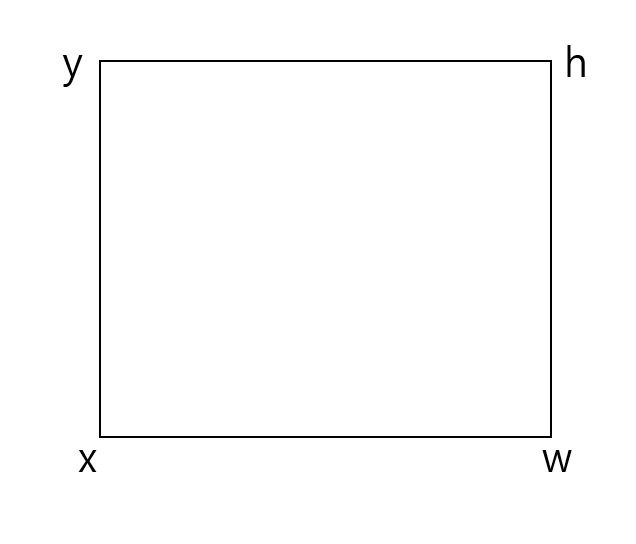

# 얼굴 인식

In [17]:
face_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_alt.xml')  # face detection xml
 
cap = cv2.VideoCapture('img/bruno.avi') 
scaling_factor = 0.5
size = (int(cap.get(3)),int(cap.get(4)))
result = cv2.VideoWriter('avi_output/face_bruno.avi',cv2.VideoWriter_fourcc(*'MJPG'),10,size) # save code
while True: 
    ret, frame = cap.read() 
    frame = cv2.resize(frame, None, fx=1, 
 fy=1, interpolation=cv2.INTER_AREA)
 
    face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=3)  # 현 크기보다 1.3배 큰 사각형 그리기
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3) 
 
    cv2.imshow('Face Detector', frame)
    result.write(frame)
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 

cap.release()
result.release()
cv2.destroyAllWindows() 

# 얼굴에 마스크 씌우기

- cv2.threshold(src,thresh,maxval,type) -> thresh = 임계값, maxval = 임계값을 넘었을 때 적용할 value

In [2]:
face_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_alt.xml')  # face detection xml
face_mask = cv2.imread('img/mask_hannibal.jpg')
h_mask,w_mask = face_mask.shape[:2]

if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')

cap = cv2.VideoCapture('img/bruno.avi')
scaling_factor = 0.5

while True:
    ret,frame = cap.read()
    frame = cv2.resize(frame,None,fx = scaling_factor,fy=scaling_factor,interpolation=cv2.INTER_AREA)
    face_rects = face_cascade.detectMultiScale(frame,scaleFactor = 1.3,minNeighbors=3) # detect to face
    for (x,y,w,h) in face_rects:
        if h<=0 or w<=0: pass
        # Adjust the height and weight parameters depending on the sizes and the locations. 
        
        h,w = int(1.4*h),int(1.0*w)
        y -= int(0.1*h)
        x = int(x)
        
        # Extract the region of interest from the image 
        frame_roi = frame[y:y+h, x:x+w] # roi 영역 추출
        face_mask_small = cv2.resize(face_mask,(w,h),interpolation=cv2.INTER_AREA)
        
        # Convert colot image to grayscale and threshold it
        gray_mask = cv2.cvtColor(face_mask_small,cv2.COLOR_BGR2GRAY) # convert gray
        ret,mask = cv2.threshold(gray_mask,180,255,cv2.THRESH_BINARY_INV) # 배경이 흰색이므로 180이상을 0으로 나머지는 255로
        
        # create an inverse mask
        mask_inv = cv2.bitwise_not(mask)
        
        try:
            # use the mask to extract the face mask region of interest
            masked_face = cv2.bitwise_and(face_mask_small, face_mask_small, mask=mask) 
            # Use the inverse mask to get the remaining part of the image 
            masked_frame = cv2.bitwise_and(frame_roi, frame_roi, mask=mask_inv) 
        except cv2.error as e:
#             print('Ignoring arithmentic exceptions: '+str(e))
            break
        
        frame[y:y+h,x:x+w] = cv2.add(masked_face,masked_frame)
    cv2.imshow('face detector',frame)
    
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# 눈 탐지

#### faces = face_cascade.detectMultiScale(gray,scaleFactor = 1.3,minNeighbors = 1) 
-  minNeighbors = batch_size와 비슷한 의미
- 작게 잡을 수록 더 세밀하게 scan

In [5]:
face_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_eye.xml')
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')
if eye_cascade.empty():
    raise IOError('Unable to load the eye cascade classifier xml file')
cap = cv2.VideoCapture('bruno.avi')
ds_factor = 0.5
size = (int(cap.get(3)),int(cap.get(4)))
result = cv2.VideoWriter('avi_output/eye_bruno.avi',cv2.VideoWriter_fourcc(*'MJPG'),10,size) # save code
while True:
    ret,frame = cap.read()
    frame = cv2.resize(frame,None,fx=ds_factor,fy=ds_factor,interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor = 1.3,minNeighbors = 1) 
   
    for (x,y,w,h) in faces: # 얼굴 뽑고
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (x_eye,y_eye,w_eye,h_eye) in eyes: # 눈 뽑는다
            center = (int(x_eye + 0.5*w_eye),int(y_eye+0.5*h_eye))
            radius = int(0.3*(w_eye + h_eye))
            color = (0,255,0)
            thickness = 3
            cv2.circle(roi_color,center,radius,color,thickness)
    cv2.imshow('Eye detector',frame)
    result.write(frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
        
result.release()
cap.release()
cv2.destroyAllWindows()